## Model Training and Prediction

SVC (Support Vector Classifier): SVC is a supervised machine learning algorithm used for classification and regression analysis. It works by finding a hyperplane in an N-dimensional space (where N is the number of features) that distinctly classifies the data points. SVC is particularly effective in high-dimensional spaces and is versatile due to its ability to handle both linear and non-linear classification problems through the use of the kernel trick.

RandomForestClassifier - Random Forest is an ensemble learning method that operates by constructing multiple decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It is known for its robustness and ability to handle large datasets with high dimensionality.

DecisionTreeClassifier - A Decision Tree Classifier is a type of supervised learning algorithm that is mostly used for classification problems. It works by creating a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. The model is built by splitting the dataset into subsets based on the values of input features, and these splits are made recursively in a manner called recursive partitioning.

LogisticsRegression - Logistic Regression is a statistical model used for binary classification problems. It is a linear model that uses the logistic function to model a binary dependent variable. The logistic function, also known as the sigmoid function, is an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1. This output can be interpreted as the probability of the positive class.

Confusion Matrix - A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. It allows visualization of the performance of an algorithm. The matrix is a 2x2 square for binary classification problems, where the rows represent the actual classes and the columns represent the predicted classes. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier

*Classification Report *- A classification report is a text report showing the main classification metrics. It includes precision, recall, f1-score, and support for each class. Precision is the ability of the classifier not to label a negative sample as positive.

In [33]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [17]:
df= pd.read_csv('heart.csv')
df.rename(columns={'age':'Age',
                     'sex':'Sex',
                     'cp': 'Chest Pain',
                     'trestbps':'Resting Blood Pressure',
                     'chol':'Cholestrol',
                     'fbs':'Blood Sugar',
                     'restecg':'Resting ECG',
                     'thalach': 'Max Heart Rate',
                     'exang': 'Exercise Induced Angina',
                     'oldpeak': 'Depression',
                     'slope': 'Slope',
                     'ca': 'Vessels colored by flourosopy',
                     'thal': 'Thallium',
                     'target': 'Heart Condition'
},inplace=True)

#### Train Set and Test Set

In [18]:
X = df.drop('Heart Condition', axis=1)
y = df['Heart Condition']

# X is my feature matrix and y are my labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

The dataset was partitioned into training, testing, and validation sets. Specifically, 80% of the data was allocated for training, 20% for testing, and within the training set, 25% was reserved for validation purposes.

#### LOGISTIC REGRESSION

In [38]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [39]:
y_pred = lr_model.predict(X_val)

# model metrics
accuracy = accuracy_score(y_val, y_pred)
print(f"Model Accuracy: {accuracy}")

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

Model Accuracy: 0.9024390243902439
[[ 82  16]
 [  4 103]]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        98
           1       0.87      0.96      0.91       107

    accuracy                           0.90       205
   macro avg       0.91      0.90      0.90       205
weighted avg       0.91      0.90      0.90       205



#### DECISION TREE

In [36]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
y_pred = dt_model.predict(X_val)
# model metrics
accuracy = accuracy_score(y_val, y_pred)
print(f"Model Accuracy: {accuracy}")

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

Model Accuracy: 0.9609756097560975
[[ 94   4]
 [  4 103]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        98
           1       0.96      0.96      0.96       107

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



In [20]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

##### SUPPORT VECTOR MACHINE

In [21]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [35]:
from sklearn.svm import SVC

svm_model = SVC()

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_val)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_val, y_pred)
print(f"Model Accuracy: {accuracy}")

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))


Model Accuracy: 0.775609756097561
[[69 29]
 [17 90]]
              precision    recall  f1-score   support

           0       0.80      0.70      0.75        98
           1       0.76      0.84      0.80       107

    accuracy                           0.78       205
   macro avg       0.78      0.77      0.77       205
weighted avg       0.78      0.78      0.77       205



#### Random Forest Regressor

In [22]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [23]:
val_score = model.score(X_val, y_val)
print(f"Validation Accuracy: {val_score}")

# Optionally, evaluate the model on the test set
test_score = model.score(X_test, y_test)
print(f"Test Accuracy: {test_score}")

Validation Accuracy: 0.9951219512195122
Test Accuracy: 0.975609756097561


In [24]:
y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.9951219512195122


#### Confusion Matrix

In [25]:
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[ 97   1]
 [  0 107]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        98
           1       0.99      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      0.99      1.00       205
weighted avg       1.00      1.00      1.00       205



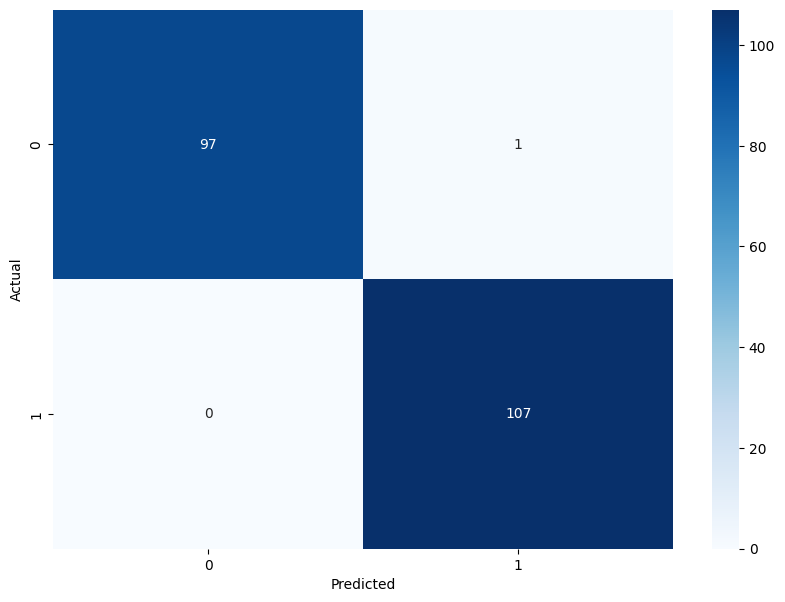

In [31]:
cm = confusion_matrix(y_val, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Top Left: TN, Top Right: FP, Bottom Left: FN, Bottom Right: TP")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In our validation dataset, the confusion matrix illustrates that the majority of our predictions align with the actual patient data, predominantly falling into the true positive and true negative categories. Only one prediction was categorized as false positive. Making our predictions accurate.

#### Xgboost

In [27]:
from xgboost import XGBClassifier

model = XGBClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [28]:
val_score = model.score(X_val, y_val)
print(f"Validation Accuracy: {val_score}")

# Optionally, evaluate the model on the test set
test_score = model.score(X_test, y_test)
print(f"Test Accuracy: {test_score}")

Validation Accuracy: 0.9951219512195122
Test Accuracy: 0.975609756097561


In [29]:
y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.9951219512195122
